In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import sndisplay as sn

Welcome to JupyROOT 6.24/02


In [2]:
from matplotlib import cycler, patches

IPython_default = plt.rcParams.copy()
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

figsize = (4.5, 3)

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.family"] = "serif"

marker_size = 3
line_width = 0.5

colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='white', edgecolor='black',
       axisbelow=True, grid=True, prop_cycle=colors)

In [13]:
file = ROOT.TFile("/Users/williamquinn/Desktop/red_output.root", "READ")
tree = file.Get("event_tree")
tree.Print()

******************************************************************************
*Tree    :event_tree:                                                        *
*Entries :    15142 : Total =        42476370 bytes  File  Size =   14602160 *
*        :          : Tree compression factor =   2.91                       *
******************************************************************************
*Br    0 :event_number : event_number/I                                      *
*Entries :    15142 : Total  Size=      61251 bytes  File Size  =      21343 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   2.85     *
*............................................................................*
*Br    1 :event_time : event_time/D                                          *
*Entries :    15142 : Total  Size=     121981 bytes  File Size  =        991 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression= 122.57     *
*...................................................

In [16]:
event_times = []
for event in tree:
    event_times.append(event.event_time)

In [18]:
print(event_times)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [37]:
anode_times = []
first_cathode = []
second_cathode = []
top_cathode_times = []
bot_cathode_times = []
n_event = 0
for event in tree:
    if len(event.tracker_time_anode) > 50:
        continue
    if len(event.calo_time) == 0:
        continue
    if len(event.tracker_time_anode) != len(event.tracker_time_top_cathode):
        continue
    
    
    times = []
    for j in range(len(event.calo_time)):
        if bool(event.calo_high_t[j]):
            times.append(event.calo_time[j])
    if len(times) == 0:
        continue
    time = np.min(times)
    
    tdc2sec = event.tracker_time_anode[0] / event.tracker_timestamp_r0[0]
    
    for i in range(len(event.tracker_time_anode)):
        anode_times.append((event.tracker_time_anode[i] - time)*1e6)
        top_cathode_times.append((event.tracker_time_top_cathode[i] - time)*1e6)
        bot_cathode_times.append((event.tracker_time_bottom_cathode[i] - time)*1e6)
        
        r0 = event.tracker_timestamp_r0[i]
        r1 = event.tracker_timestamp_r1[i]
        r2 = event.tracker_timestamp_r2[i]
        if r1 < r2:
            first_cathode.append((r1*tdc2sec - time)*1e6)
            second_cathode.append((r2*tdc2sec - time)*1e6)
        else:
            first_cathode.append((r2*tdc2sec - time)*1e6)
            second_cathode.append((r1*tdc2sec - time)*1e6)
            
    n_event += 1
print(n_event)

11524


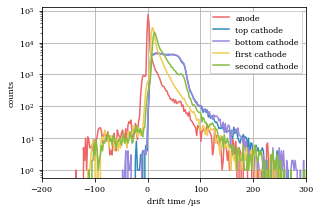

In [36]:
fig = plt.figure(figsize=figsize, facecolor='white')
freq, bin_edges = np.histogram(anode_times, 250, range=(-200,300))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "-", label='anode')

freq, bin_edges = np.histogram(top_cathode_times, 250, range=(-200,300))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "-", label='top cathode')

freq, bin_edges = np.histogram(bot_cathode_times, 250, range=(-200,300))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "-", label='bottom cathode')

freq, bin_edges = np.histogram(first_cathode, 250, range=(-200,300))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "-", label='first cathode')

freq, bin_edges = np.histogram(second_cathode, 250, range=(-200,300))
width = bin_edges[-1] - bin_edges[-2]
bin_centres = bin_edges[:-1] + width/2
plt.plot(bin_centres, freq, "-", label='second cathode')

plt.xlabel("drift time /µs")
plt.ylabel("counts")
plt.yscale('log')
plt.legend(loc='best')
plt.xlim(-200,300)
plt.tight_layout()

In [44]:
for event in tree:
    for i in range(len(event.tracker_timestamp_r3)):
        a = event.tracker_timestamp_r3[i]
        if a <=0:
            print(a)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [16]:
def cell_id(cellnum):
    cell_side = cellnum // (9 * 113)
    cell_row = cellnum % (9 * 113) // 9
    cell_layer = cellnum % (9 * 113) % 9

    return cell_side, cell_row, cell_layer
def cell_num_(side, row, layer):
    return side*113*9 + row*9 + layer

In [40]:
files = ["run_608.txt", "run_612.txt", "run_617.txt", "run_618.txt",
         "run_619.txt", "run_623.txt", "run_635.txt", "run_638.txt",
         "run_640.txt", "run_641.txt", "run_642.txt", "run_645.txt",
         "run_652.txt", "run_653.txt", "run_654.txt", "run_660.txt",
         "run_668.txt", "run_669.txt", "run_670.txt", "run_671.txt"]
times = [60, 60, 10, 10,
         10, 15, 3.66667, 30,
         5, 5, 5, 15,
         10, 10, 10, 15,
         10, 10, 10, 10]
HVs = [1600, 1600, 1600, 1600,
       1600, 1600, 1650, 1612,
       1650, 1675, 1700, 1625,
       1650, 1650, 1650, 1675,
       1600, 1625, 1650, 1675]
Areas = [0, 3, 3, 3,
         3, 4, 5, 6,
         6, 6, 6, 7,
         1, 1, 1, 2,
         4, 4, 4, 4]

mult = [[0, 0, 0] for i in range(2034)]
event_nums = [[] for i in range(2034)]
new_event = True
new_lines = []
for index, i_file in enumerate(files):
    file = open("/Users/williamquinn/Desktop/" + i_file, "r")
    fl = file.readlines()
    
    for line_index, line in enumerate(fl):
        line_list = line.split(" ")
        if line == '\n':
            continue
            
        print(line_list)
        new_lines.append(line_list)

['Event', 'Num:', '0', 'Cell:', '121', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '0', 'Cell:', '111', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1', 'Cell:', '120', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1', 'Cell:', '110', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2', 'Cell:', '115', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6', 'Cell:', '47', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '6', 'Cell:', '1140', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
[

['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '425', 'Cell:', '1138', 'size:', '3\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['2:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '425', 'Cell:', '1139', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '426', 'Cell:', '59', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '427', 'Cell:', '58', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '427', 'Cell:', '1134', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '428', 'Cell:', '2', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '428

['top_cathode', '\n']
['Event', 'Num:', '764', 'Cell:', '1106', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '765', 'Cell:', '19', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '765', 'Cell:', '20', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '765', 'Cell:', '1029', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '767', 'Cell:', '1046', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '768', 'Cell:', '1139', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '768', 'Cell:', '1138', 'size:', '

['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '987', 'Cell:', '1072', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '987', 'Cell:', '1071', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '988', 'Cell:', '1039', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '993', 'Cell:', '110', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '993', 'Cell:', '111', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '994', 'Cell:', '1068', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '995', 'Cell:', '123', 'size:', '2\n']
['0:', '\n']
['anode'

['top_cathode', '\n']
['Event', 'Num:', '1221', 'Cell:', '1063', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1221', 'Cell:', '64', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1221', 'Cell:', '1046', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1223', 'Cell:', '48', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1223', 'Cell:', '1118', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1223', 'Cell:', '1128', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1223', 'Cell:', '1119', 'si

['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1467', 'Cell:', '1045', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1468', 'Cell:', '1136', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1468', 'Cell:', '1135', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1470', 'Cell:', '24', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1471', 'Cell:', '1067', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1471', 'Cell:', '1068', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1471', '

['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1737', 'Cell:', '1118', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1738', 'Cell:', '1075', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1741', 'Cell:', '51', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1743', 'Cell:', '1092', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1743', 'Cell:', '1085', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1745', 'Cell:', '1029', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1745', 'Cell:', '11', 'size:', '2\n']
['0:', '\n']
['

['bottom_cathode', '\n']
['Event', 'Num:', '2034', 'Cell:', '1019', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2034', 'Cell:', '11', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2034', 'Cell:', '1017', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2035', 'Cell:', '5', 'size:', '2\n']
['0:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2036', 'Cell:', '48', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2036', 'Cell:', '64', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2036', 'Cell:', '49', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '

['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2287', 'Cell:', '1102', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2291', 'Cell:', '61', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2295', 'Cell:', '1063', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2295', 'Cell:', '1111', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2295', 'Cell:', '1071', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2295', 'Cell:', '1073', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2295', 'Cell:', '1072', 'size:', '2\n']
['

['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2561', 'Cell:', '64', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2562', 'Cell:', '123', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2562', 'Cell:', '1072', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2562', 'Cell:', '1064', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2562', 'Cell:', '1063', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2562', 'Cell:', '1058', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 

['top_cathode', '\n']
['Event', 'Num:', '2834', 'Cell:', '116', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2835', 'Cell:', '50', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2837', 'Cell:', '31', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2837', 'Cell:', '1090', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '2837', 'Cell:', '64', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2837', 'Cell:', '37', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2837', 'Cell:', '46', 'size:', '2\n']


['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3141', 'Cell:', '1085', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['Event', 'Num:', '3142', 'Cell:', '1072', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3143', 'Cell:', '5', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['Event', 'Num:', '3143', 'Cell:', '1044', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3143', 'Cell:', '9', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '3143', 'Cell:', '2', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']

['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3474', 'Cell:', '1057', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3474', 'Cell:', '1064', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3479', 'Cell:', '120', 'size:', '2\n']
['0:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3481', 'Cell:', '124', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3481', 'Cell:', '123', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3482', 'Cell:', '49', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3482', 'Cel

['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3748', 'Cell:', '1134', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '3748', 'Cell:', '1135', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3749', 'Cell:', '1063', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3750', 'Cell:', '1128', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3751', 'Cell:', '1029', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3751', 'Cell:', '1028', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '3753', 'Cell:', '1119', 'size:', '2\n']
['0

['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['Event', 'Num:', '4014', 'Cell:', '120', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4014', 'Cell:', '1076', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4014', 'Cell:', '1084', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4014', 'Cell:', '122', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4015', 'Cell:', '83', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '4019', 'Cell:', '49', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['

['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4310', 'Cell:', '1109', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '4311', 'Cell:', '1026', 'size:', '3\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['2:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4312', 'Cell:', '1122', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['Event', 'Num:', '4313', 'Cell:', '1018', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4313', 'Cell:', '1068', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4313', 'Cell:', '1058', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '

['top_cathode', '\n']
['Event', 'Num:', '4559', 'Cell:', '8', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4559', 'Cell:', '19', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '4559', 'Cell:', '56', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '4563', 'Cell:', '16', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4565', 'Cell:', '2', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4568', 'Cell:', '84', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4569', 'Cell:', '1140', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom

['Event', 'Num:', '4834', 'Cell:', '111', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4834', 'Cell:', '121', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4835', 'Cell:', '19', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '4835', 'Cell:', '1', 'size:', '2\n']
['0:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4835', 'Cell:', '2', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4835', 'Cell:', '1048', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '4837', 'Cell:', '1058', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode'

['top_cathode', '\n']
['Event', 'Num:', '5042', 'Cell:', '1135', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5042', 'Cell:', '1134', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5042', 'Cell:', '1129', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5042', 'Cell:', '1122', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5043', 'Cell:', '37', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5043', 'Cell:', '23', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5043', 'Cell:', '22', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']

['Event', 'Num:', '5348', 'Cell:', '19', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '5349', 'Cell:', '1112', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5350', 'Cell:', '41', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5350', 'Cell:', '32', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5351', 'Cell:', '1072', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5352', 'Cell:', '65', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5353', 'Cell:', '1047', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['

['top_cathode', '\n']
['Event', 'Num:', '5655', 'Cell:', '1108', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5655', 'Cell:', '1068', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5662', 'Cell:', '46', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5663', 'Cell:', '1046', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5663', 'Cell:', '1045', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5666', 'Cell:', '1134', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5666', 'Cell:', '1135', 'size:', '2\n']
['0:', '\n']
['anode'

['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '5985', 'Cell:', '1034', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '5987', 'Cell:', '116', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5989', 'Cell:', '5', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5991', 'Cell:', '1034', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5993', 'Cell:', '1122', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5994', 'Cell:', '35', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '5996', 'Cell:', '1019', 's

['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '6323', 'Cell:', '11', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '6324', 'Cell:', '48', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6324', 'Cell:', '37', 'size:', '3\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['2:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6324', 'Cell:', '47', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6326', 'Cell:', '40', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6326', 'Cell:', '8', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6327', 'Cell:', '1029', 

['top_cathode', '\n']
['Event', 'Num:', '6644', 'Cell:', '1046', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6645', 'Cell:', '32', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6648', 'Cell:', '19', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6648', 'Cell:', '50', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '6648', 'Cell:', '48', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6648', 'Cell:', '39', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6648', 'Cell:', '20', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode',

['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6937', 'Cell:', '1030', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6937', 'Cell:', '1041', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6938', 'Cell:', '120', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6938', 'Cell:', '121', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6938', 'Cell:', '1026', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6940', 'Cell:', '1048', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6941', 'Cell:', '1080', 'size:', '2\n']
['0:', '

['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '7287', 'Cell:', '64', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '7287', 'Cell:', '1072', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '7287', 'Cell:', '1074', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '7288', 'Cell:', '19', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['Event', 'Num:', '7288', 'Cell:', '2', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '7288', 'Cell:', '11', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event

['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6404', 'Cell:', '1517', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6413', 'Cell:', '1455', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '6415', 'Cell:', '1515', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6423', 'Cell:', '1515', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6442', 'Cell:', '1517', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '6476', 'Cell:', '1517', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '

['top_cathode', '\n']
['Event', 'Num:', '14965', 'Cell:', '1460', 'size:', '2\n']
['0:', '\n']
['anode', '\n']
['1:', '\n']
['anode', '\n']
['Event', 'Num:', '14965', 'Cell:', '1461', 'size:', '2\n']
['0:', '\n']
['anode', '\n']
['1:', '\n']
['anode', '\n']
['Event', 'Num:', '15013', 'Cell:', '1517', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '15028', 'Cell:', '1517', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '15028', 'Cell:', '1515', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '15051', 'Cell:', '1461', 'size:', '2\n']
['0:', '\n']
['anode', '\n']
['1:', '\n']
['anode', '\n']
['Event', 'Num:', '15109', 'Cell:', '1461', 'size:', '2\n']
['0:', '\n']
['anode', '\n']
['1:', '\n']
['anode', '\n']
['Event', 'Num:', '15112', 'Cell:',

['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1072', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1072', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1076', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1076', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1104', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1104', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1129', 'Cell:', 

['Event', 'Num:', '1151', 'Cell:', '810', 'size:', '6\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['2:', '\n']
['top_cathode', '\n']
['3:', '\n']
['top_cathode', '\n']
['4:', '\n']
['top_cathode', '\n']
['5:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1151', 'Cell:', '757', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1151', 'Cell:', '999', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1151', 'Cell:', '1000', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1151', 'Cell:', '1002', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1151', 'Cell:', '1010', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1151', 'Cell:', 

['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '549', 'Cell:', '504', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '549', 'Cell:', '505', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '549', 'Cell:', '506', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '550', 'Cell:', '556', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '568', 'Cell:', '509', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '568', 'Cell:', '510', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '570', 'Cell:', '506', 'size:', '2\n']
['0:', '\n']
['anod

['top_cathode', '\n']
['Event', 'Num:', '1566', 'Cell:', '505', 'size:', '2\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '1566', 'Cell:', '506', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '1566', 'Cell:', '510', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1566', 'Cell:', '504', 'size:', '3\n']
['0:', '\n']
['top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['2:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '1566', 'Cell:', '495', 'size:', '2\n']
['0:', '\n']
['bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '1574', 'Cell:', '1603', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1585', 'Cell:', '556', 'size:', '2\n']
['0:', '\n']
[

['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1095', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1134', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1134', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1145', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1145', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1158', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_ca

['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2293', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2300', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2300', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2301', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2301', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2368', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2368', 'Cell:', '594', 'size:', '2

['Event', 'Num:', '26', 'Cell:', '505', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '26', 'Cell:', '504', 'size:', '3\n']
['0:', '\n']
['anode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['2:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '26', 'Cell:', '495', 'size:', '2\n']
['0:', '\n']
['bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '26', 'Cell:', '509', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '39', 'Cell:', '505', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '39', 'Cell:', '510', 'size:', '2\n']
['0:', '\n']
['top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '42', 'Cell:', '510', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', 

['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1200', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1207', 'Cell:', '550', 'size:', '2\n']
['0:', '\n']
['bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['Event', 'Num:', '1222', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1222', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '1223', 'Cell:', '550', 'size:', '7\n']
['0:', '\n']
['bottom_cathode', '\n']
['1:', '\n']
['bottom_cathode', '\n']
['2:', '\n']
['bottom_cathode', '\n']
['3:', '\n']
['bottom_cathode', '\n']
['4:', '\n']
['bottom_cathode', '\n']
['5:', '\n']
['bottom_cathode', '\n']
['6:', '\n']
['bot

['top_cathode', '\n']
['Event', 'Num:', '2738', 'Cell:', '529', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2743', 'Cell:', '1593', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2749', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2749', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2755', 'Cell:', '595', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2755', 'Cell:', '594', 'size:', '2\n']
['0:', '\n']
['anode', 'top_cathode', 'bottom_cathode', '\n']
['1:', '\n']
['top_cathode', '\n']
['Event', 'Num:', '2794', 'Cell:', '506', 'size:', '3\n']
['0:', 

In [52]:
mult_a = [0 for i in range(2034)]
mult_b_c = [0 for i in range(2034)]
mult_t_c = [0 for i in range(2034)]
mult_both_c = [0 for i in range(2034)]
for index, line in enumerate(new_lines):
    if line[0] == 'Event':
        cell_num = int(line[4])
        j = 0
        i = int(line[-1].strip())
        anodes = 0
        top_cathodes = 0
        bot_cathodes = 0
        
        for l in range(i):
            temp = new_lines[index + 2 + j]
            j += 2
            
            for _type in temp:
                if _type == '\n':
                    continue
                elif _type == 'anode':
                    anodes += 1
                elif _type == 'top_cathode':
                    top_cathodes += 1
                elif _type == 'bottom_cathode':
                    bot_cathodes += 1
        print("events:", i, ":", anodes, top_cathodes, bot_cathodes)
        if anodes > 0:
            if anodes > 1:
                print("Anode")
                mult_a[cell_num] += 1
            elif top_cathodes > anodes and bot_cathodes > anodes:
                print("Both Cathodes")
                mult_both_c[cell_num] += 1
            elif top_cathodes > anodes:
                print("Top Cathode")
                mult_t_c[cell_num] += 1
            elif bot_cathodes > anodes:
                print("Bot Cathode")
                mult_b_c[cell_num] += 1
        else:
            if top_cathodes == bot_cathodes:
                print("Both")
                mult_both_c[cell_num] += 1
            elif top_cathodes > bot_cathodes:
                print("Top Cathode")
                mult_t_c[cell_num] += 1
            elif bot_cathodes > top_cathodes:
                print("Bot Cathode")
                mult_b_c[cell_num] += 1

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 3 : 1 3 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 

Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 3 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 3 : 1 3 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 3 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathod

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 3 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 

events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 3 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 3 : 1 3 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 3 2
Both Cathodes
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 3 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 

Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Ca

events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 

events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 

events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 3 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 3 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 

events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 2 1 1
Anode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 2 1 1
Anode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 2 0 0
Anode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 3 : 1 0 3
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 2 1 0
Anode
events: 2 : 2 1 0
Anode
events: 2 : 2 0 0
Anode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 2 0 0
Anode
events: 2 : 2 0 0
Anode
events: 2 : 1 2 1
Top Cathode
events: 2 : 2 0 0
Anode
events: 2 : 2 1 1
Anode
events: 2 : 2 1 1
Anode
events: 2 : 1 1 1
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 2 0 0
Anode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 2 0 0
Anode
events: 2 : 2 0 0
Anode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
even

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 2
Both Cathodes
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 2 1 1
Anode
events: 2 : 2 1 1
Anode
events: 6 : 0 0 6
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 3 : 0 0 3
Bo

events: 2 : 1 2 0
Top Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 0 1 2
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 0 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 3 : 1 1 3
Bot Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 3 : 1 1 3
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 3 : 1 1 3
Bot Cathode
events: 3 : 1 1 3
Bot Cathode
events: 3 : 1 1 3
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 3 : 1 1 3
Bot Cathode
events: 3 : 1 1 3
Bot Cathode
events: 2 

events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 1 2
Bot Cathode
events: 2 : 0 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 0 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 

events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 

events: 6 : 1 0 6
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 3 : 1 1 3
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 2 : 1 2 0
Top Cathode
events: 3 : 1 1 3
Bot Cathode
events: 2 : 0 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 2 1
Top Cathode
events: 2 : 1 1 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 2 : 1 0 2
Bot Cathode
events: 8 : 1 0 8
Bot Cathode
events: 2 : 0 2 0
Top Cathode
events: 3 : 1 3 0
Top Cathode
events: 2 : 0 2 0
Top Cathode
events: 3 : 0 3 0
Top Cathode
events: 6 

In [34]:
print(cell_num_(1, 55, 3))

1515


[83, 92, 214, 322, 401, 641, 658, 790, 821, 928, 1037, 1108, 1178, 1288, 1445, 2157, 2335, 2714, 2727, 2878, 3034, 3120, 3185, 3325, 3362, 3451, 3537, 3744, 3883, 3941, 4098, 4120, 4216, 4346, 4383, 4497, 4572, 4595, 4725, 4754, 4798, 4899, 4913, 4915, 4997, 5046, 5121, 5136, 5148, 5176, 5210, 5434, 5478, 5612, 5661, 5688, 5723, 5757, 5873, 5966, 5974, 6005, 6149, 6190, 6415, 6423, 7048, 7105, 7125, 7278, 7378, 7413, 7453, 7528, 7620, 8272, 8370, 8479, 8511, 8549, 8756, 8940, 9065, 9494, 9667, 9922, 10054, 10141, 10200, 10300, 10558, 10732, 10962, 10972, 10985, 11103, 11321, 11343, 11584, 11597, 11745, 11861, 11865, 12018, 12114, 12186, 12672, 12808, 12841, 12856, 12864, 12893, 12977, 13338, 13341, 13416, 13559, 13573, 13579, 13771, 13893, 13934, 14002, 14025, 14037, 14109, 14174, 14217, 14269, 14410, 14482, 14696, 14728, 14755, 14762, 14763, 14776, 14795, 14848, 15028, 59, 189, 190, 242, 343, 387, 439, 495, 608, 684, 948, 983, 1015, 1048, 1208, 1248, 1458, 1482, 1508, 1653, 1774, 1787

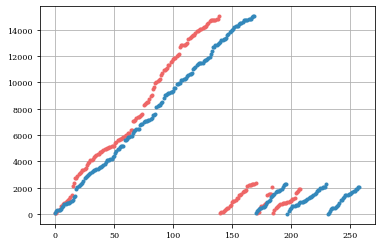

In [31]:
_1_55_3 = cell_num_(1, 55, 3)
_1_55_5 = cell_num_(1, 55, 5)
plt.plot(event_nums[_1_55_3], ".")
plt.plot(event_nums[_1_55_5], ".")

print(event_nums[_1_55_3])
print(event_nums[_1_55_5])

In [53]:
sntracker = sn.tracker('multiplicity_anodes', with_palette=True)
sntracker.draw_cellid_label()
sntracker.draw_content_label('{}')

for i_cell in range(len(mult_a)):
    if mult_a[i_cell] == 0:
        continue
    sntracker.setcontent(i_cell, mult_a[i_cell])

# sntracker.setrange(0, 35)

sntracker.draw()
sntracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//multiplicity_anodes_tr.pdf has been created


In [54]:
sntracker = sn.tracker('multiplicity_top_cathodes', with_palette=True)
sntracker.draw_cellid_label()
sntracker.draw_content_label('{}')

for i_cell in range(len(mult_t_c)):
    if mult_t_c[i_cell] == 0:
        continue
    sntracker.setcontent(i_cell, mult_t_c[i_cell])

# sntracker.setrange(0, 35)

sntracker.draw()
sntracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//multiplicity_top_cathodes_tr.pdf has been created


In [55]:
sntracker = sn.tracker('multiplicity_bottom_cathodes', with_palette=True)
sntracker.draw_cellid_label()
sntracker.draw_content_label('{}')

for i_cell in range(len(mult_b_c)):
    if mult_b_c[i_cell] == 0:
        continue
    sntracker.setcontent(i_cell, mult_b_c[i_cell])

# sntracker.setrange(0, 35)

sntracker.draw()
sntracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//multiplicity_bottom_cathodes_tr.pdf has been created


In [56]:
sntracker = sn.tracker('multiplicity_both_cathodes', with_palette=True)
sntracker.draw_cellid_label()
sntracker.draw_content_label('{}')

for i_cell in range(len(mult_both_c)):
    if mult_both_c[i_cell] == 0:
        continue
    sntracker.setcontent(i_cell, mult_both_c[i_cell])

# sntracker.setrange(0, 35)

sntracker.draw()
sntracker.save("/Users/williamquinn/Desktop/")

Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop//multiplicity_both_cathodes_tr.pdf has been created


In [ ]:
sntracker = sn.tracker('multiplicity_all', with_palette=True)
sntracker.draw_cellid_label()
sntracker.draw_content_label('{}')

for i_cell in range(len(mult_a)):
    if mult_a[i_cell] > 0:
        pass
    if mult_b_c[i_cell] > 0:
        pass
    if mult_t_c[i_cell] > 0:
        pass
    if mult_both_c[i_cell] > 0:
        pass
    sntracker.setcontent(i_cell, mult_a[i_cell])

# sntracker.setrange(0, 35)

sntracker.draw()
sntracker.save("/Users/williamquinn/Desktop/")

In [62]:
sntracker = sn.tracker('types', with_palette=False)
sntracker.draw_cellid_label()
sntracker.draw_content_label('{}')

for i_cell in range(2034):
    side, row, layer = cell_id(i_cell)
    if not (row in [69, 70]):
        if layer in [0, 8] or row in [0, 13, 14, 27, 28, 41, 42, 55, 56, 68, 71, 84, 85, 98, 99, 112]:
            sntracker.setcontent(i_cell, 1)
        else:
            sntracker.setcontent(i_cell, 2)

# sntracker.setrange(0, 35)

sntracker.draw()
sntracker.save("/Users/williamquinn/Desktop")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: types_canvas
Info in <TCanvas::Print>: pdf file /Users/williamquinn/Desktop/types_tr.pdf has been created
